# Dolead

In [26]:
import pandas as pd
from datetime import timedelta
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
from timezonefinder import TimezoneFinder
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [45]:
df = pd.read_csv('/Users/oussamanaji/Downloads/dolead_vw_extract_2024_10_30.csv')
df['starttimestamp'] = pd.to_datetime(df['starttimestamp'])
df['endtimestamp'] = pd.to_datetime(df['endtimestamp'])

In [84]:
df_us_horraire = pd.read_csv('us_zip_codes_to_longitude_and_latitude.csv')
df_us_pop = pd.read_csv('population_by_zip_2010.csv')


In [85]:
#Regler le fuseau horraire
df_dolead=df[df['agent'] == 'dolead_att'].copy()
df_dolead = df_dolead.merge(df_us_horraire[['Zip', 'Timezone', 'Daylight_savings_time_flag']], 
                            left_on='zip_code', 
                            right_on='Zip', 
                            how='left')
df_dolead['heure_offset'] = df_dolead['Timezone'] + df_dolead['Daylight_savings_time_flag']
df_dolead['starttimestamp'] = df_dolead['starttimestamp'] + pd.to_timedelta(df_dolead['heure_offset'], unit='h')
df_dolead['endtimestamp'] = df_dolead['endtimestamp'] + pd.to_timedelta(df_dolead['heure_offset'], unit='h')
df_dolead['local_hour'] = df_dolead['starttimestamp'].dt.hour
df_dolead=df_dolead.drop(columns=['Zip', 'Timezone', 'Daylight_savings_time_flag', 'heure_offset'])
df_dolead

,discussionid,agent,starttimestamp,endtimestamp,callto,duration,picked,zip_code,local_hour
0,CA2ea0921b2e50aa3c05729cac332e7630,dolead_att,2024-10-15 11:04:24.223,2024-10-15 11:04:28.909,18033371229,4.686,False,29130,11
1,CA175ce2872ee3ede611ef4859f70d495a,dolead_att,2024-10-15 11:10:14.815,2024-10-15 11:10:18.945,18033371229,4.130,False,29130,11
2,CA6e9749bbe599976e1144f0619c6f004a,dolead_att,2024-10-15 10:41:17.902,2024-10-15 10:41:22.887,15807401618,4.985,False,74701,10
3,CA510c4a5dd159f9b41eac700f6300a392,dolead_att,2024-10-15 10:46:39.239,2024-10-15 10:46:42.920,15807401618,3.681,False,74701,10
4,CAb258ea9d164dde4cf1cbaece5b32bae7,dolead_att,2024-10-15 11:51:53.959,2024-10-15 11:52:53.267,12294742370,59.308,True,31601,11
...,...,...,...,...,...,...,...,...,...
399,CAfe1abfa2a5ca636719ddd8d53ea1c74d,dolead_att,2024-10-29 16:30:55.574,2024-10-29 16:31:10.311,15023541606,14.737,True,40071,16
400,CA4c4a95e145a7d027a3b2fe3e4d36e647,dolead_att,2024-10-30 09:02:28.533,2024-10-30 09:02:33.809,18282438253,5.276,False,28732,9
401,CA844ecb5949bdf341310e173ccfd90488,dolead_att,2024-10-30 08:03:24.513,2024-10-30 08:03:57.078,12144389365,32.565,True,75228,8
402,CAb90f0283d09cb59969c45677dfb6860d,dolead_att,2024-10-30 09:08:21.816,2024-10-30 09:08:26.249,18282438253,4.433,False,28732,9


In [87]:
#Ajout de la population par zipcode
pop_dict = df_us_pop.groupby('zipcode')['population'].sum().to_dict()
df_dolead['population'] = df_dolead['zip_code'].map(pop_dict)

## Encodage

In [90]:
df_dolead=pd.get_dummies(df_dolead, columns=['picked'], drop_first=True, dtype=int)
#df_vw_endoded['normalized_duration'] = (df_vw_endoded['duration'] - df_vw_endoded['duration'].min()) / (df_vw_endoded['duration'].max() - df_vw_endoded['duration'].min())
scaler = StandardScaler()
df_dolead['normalized_duration'] = scaler.fit_transform(df_dolead[['duration']])

df_dolead['hour_sin'] = np.sin(2 * np.pi * df_dolead['local_hour'] / 24)
df_dolead['hour_cos'] = np.cos(2 * np.pi * df_dolead['local_hour'] / 24)

df_dolead['normalized_population'] = scaler.fit_transform(df_dolead[['population']])
df_dolead

,discussionid,agent,starttimestamp,endtimestamp,callto,duration,zip_code,local_hour,population,picked_True,normalized_duration,hour_sin,hour_cos,normalized_population
0,CA2ea0921b2e50aa3c05729cac332e7630,dolead_att,2024-10-15 11:04:24.223,2024-10-15 11:04:28.909,18033371229,4.686,29130,11,19965,0,-0.435255,0.258819,-0.965926,-1.089343
1,CA175ce2872ee3ede611ef4859f70d495a,dolead_att,2024-10-15 11:10:14.815,2024-10-15 11:10:18.945,18033371229,4.130,29130,11,19965,0,-0.461511,0.258819,-0.965926,-1.089343
2,CA6e9749bbe599976e1144f0619c6f004a,dolead_att,2024-10-15 10:41:17.902,2024-10-15 10:41:22.887,15807401618,4.985,74701,10,67095,0,-0.421135,0.500000,-0.866025,-0.097025
3,CA510c4a5dd159f9b41eac700f6300a392,dolead_att,2024-10-15 10:46:39.239,2024-10-15 10:46:42.920,15807401618,3.681,74701,10,67095,0,-0.482715,0.500000,-0.866025,-0.097025
4,CAb258ea9d164dde4cf1cbaece5b32bae7,dolead_att,2024-10-15 11:51:53.959,2024-10-15 11:52:53.267,12294742370,59.308,31601,11,98190,1,2.144212,0.258819,-0.965926,0.557677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,CAfe1abfa2a5ca636719ddd8d53ea1c74d,dolead_att,2024-10-29 16:30:55.574,2024-10-29 16:31:10.311,15023541606,14.737,40071,16,42876,1,0.039393,-0.866025,-0.500000,-0.606954
400,CA4c4a95e145a7d027a3b2fe3e4d36e647,dolead_att,2024-10-30 09:02:28.533,2024-10-30 09:02:33.809,18282438253,5.276,28732,9,49473,0,-0.407393,0.707107,-0.707107,-0.468055
401,CA844ecb5949bdf341310e173ccfd90488,dolead_att,2024-10-30 08:03:24.513,2024-10-30 08:03:57.078,12144389365,32.565,75228,8,199653,1,0.881302,0.866025,-0.500000,2.693969
402,CAb90f0283d09cb59969c45677dfb6860d,dolead_att,2024-10-30 09:08:21.816,2024-10-30 09:08:26.249,18282438253,4.433,28732,9,49473,0,-0.447203,0.707107,-0.707107,-0.468055


In [91]:
df_dolead_encoded = df_dolead.copy().drop(columns=['agent','starttimestamp','endtimestamp','zip_code','duration','local_hour','population','callto']).dropna()
df_dolead_encoded

,discussionid,picked_True,normalized_duration,hour_sin,hour_cos,normalized_population
0,CA2ea0921b2e50aa3c05729cac332e7630,0,-0.435255,0.258819,-0.965926,-1.089343
1,CA175ce2872ee3ede611ef4859f70d495a,0,-0.461511,0.258819,-0.965926,-1.089343
2,CA6e9749bbe599976e1144f0619c6f004a,0,-0.421135,0.500000,-0.866025,-0.097025
3,CA510c4a5dd159f9b41eac700f6300a392,0,-0.482715,0.500000,-0.866025,-0.097025
4,CAb258ea9d164dde4cf1cbaece5b32bae7,1,2.144212,0.258819,-0.965926,0.557677
...,...,...,...,...,...,...
398,CAd960cdb1d64db5696c4373abf51efcca,1,1.957063,-0.500000,-0.866025,-0.749769
399,CAfe1abfa2a5ca636719ddd8d53ea1c74d,1,0.039393,-0.866025,-0.500000,-0.606954
400,CA4c4a95e145a7d027a3b2fe3e4d36e647,0,-0.407393,0.707107,-0.707107,-0.468055
401,CA844ecb5949bdf341310e173ccfd90488,1,0.881302,0.866025,-0.500000,2.693969


### PCA / T-SNE

In [92]:
pca = PCA(n_components=2)  # On ne garde que les 2 premières composantes

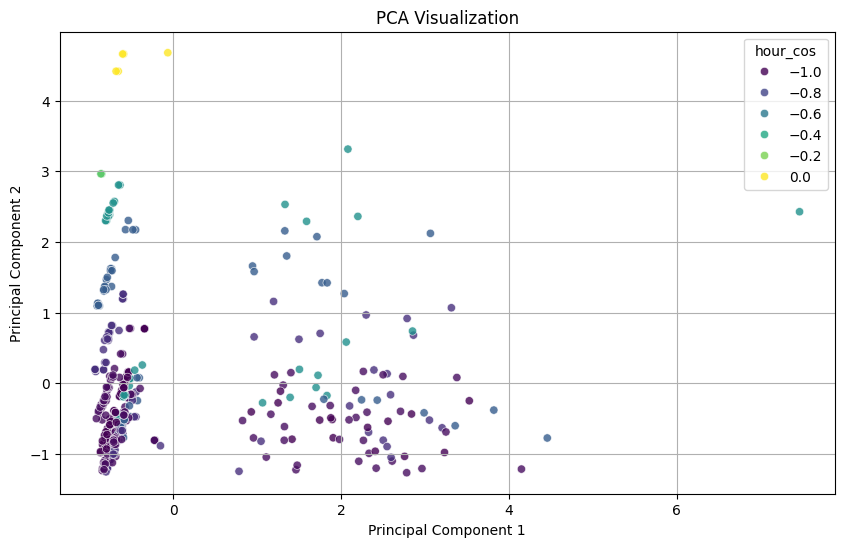

In [105]:
features = df_dolead_encoded.select_dtypes(include=[np.number])  # Sélectionner uniquement les colonnes numériques
scaled_features = scaler.fit_transform(features)
principal_components = pca.fit_transform(scaled_features)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']).reset_index(drop=True)

# Ajouter la colonne 'label' à partir de la colonne 'hour_cos' de df_vw_encoded_reset
pca_df['label'] = df_dolead_encoded.reset_index(drop=True)['hour_cos']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Modifier le titre de la légende
plt.legend(title='hour_cos')

plt.grid()
plt.show()

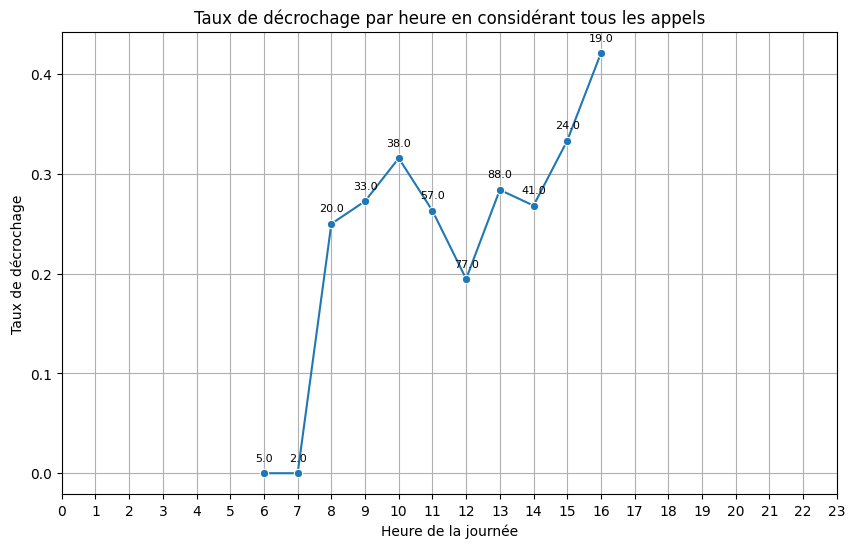

In [101]:
# taux de decrochage en fonction de l'heure 
hourly_data = df_dolead.groupby('local_hour')['picked_True'].agg(['mean', 'count']).reset_index()
hourly_data.columns = ['local_hour', 'pickup_rate', 'call_count']

# Visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data, x='local_hour', y='pickup_rate', marker='o')
plt.title('Taux de décrochage par heure en considérant tous les appels')
plt.xlabel('Heure de la journée')
plt.ylabel('Taux de décrochage')
plt.xticks(range(0, 24))  # Assure l'affichage de toutes les heures de 0 à 23

for i, row in hourly_data.iterrows():
    plt.text(row['local_hour'], row['pickup_rate'] + 0.01,  # Position juste au-dessus du point
             f"{row['call_count']}", ha='center', va='bottom', fontsize=8, color='black')

plt.grid()
plt.show()

In [102]:
pca_df = pca_df.rename(columns={'label': 'hour_cos'})
pca_df['hour_sin'] = df_dolead_encoded.reset_index(drop=True)['hour_sin']
pca_df['normalized_duration'] = df_dolead_encoded.reset_index(drop=True)['normalized_duration']
pca_df['normalized_population'] = df_dolead_encoded.reset_index(drop=True)['normalized_population']
pca_df

,PC1,PC2,hour_cos,hour_sin,normalized_duration,normalized_population
0,-0.874824,-0.414413,-0.965926,0.258819,-0.435255,-1.089343
1,-0.893178,-0.414037,-0.965926,0.258819,-0.461511,-1.089343
2,-0.776174,0.606705,-0.866025,0.500000,-0.421135,-0.097025
3,-0.819222,0.607586,-0.866025,0.500000,-0.482715,-0.097025
4,2.735036,0.096914,-0.965926,0.258819,2.144212,0.557677
...,...,...,...,...,...,...
387,2.594209,-1.047900,-0.866025,-0.500000,1.957063,-0.749769
388,1.391078,-0.199173,-0.500000,-0.866025,0.039393,-0.606954
389,-0.803427,1.323607,-0.707107,0.707107,-0.407393,-0.468055
390,2.079685,3.313321,-0.500000,0.866025,0.881302,2.693969


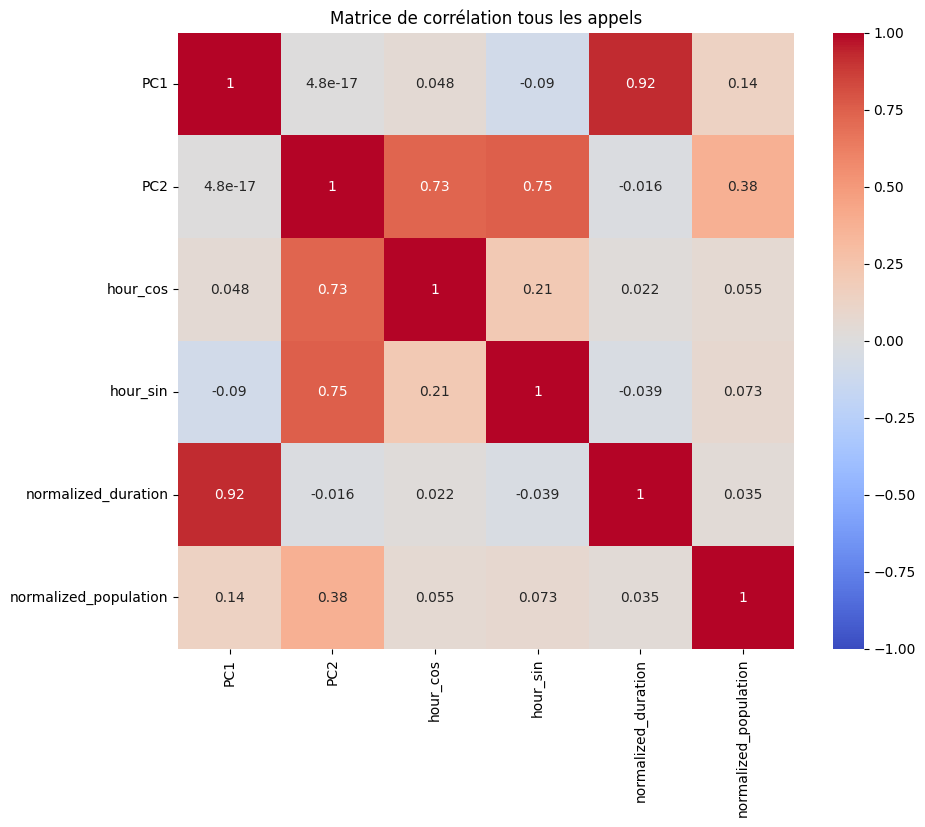

In [104]:
corr_matrix_pca =  pca_df.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matrice de corrélation tous les appels')
plt.show()